IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [12]:
# Importation des librairies standards:
import numpy as np
import copy
import time
import statistics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [3]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [4]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [5]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [6]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [7]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [8]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# Sommaire

## 1. Apprentissage supervisé
#### 1.1 Extraction des données pour la prédiction fromage
#### 1.2 Classification avec le KNN
#### 1.3 Classification avec le Perceptron

## 2. Apprentissage non supervisé
#### 2.1 Classification avec le KNN
#### 2.2 Classification avec le Perceptron



## 1. **Apprentissage supervisé**
Dans cette partie, nous allons essayer de classifier des données en utilisant deux algorithmes de classification avec apprentissage supervisé : le KNN et le Perceptron. 

### <u>Problématique:</u> Peut-on prédire si un exemple est un fromage ou non, à partir des informations qui lui sont associées ?

### 1.1 **Extraction des données pour la prédiction fromage**

Tout d'abord, il faut préparer les données en leur donnant un label et en ne gardant que les attributs qui nous intéressent pour la classification. Pour cela :
- nous construisons un dataset qui contient une partie des exemples labelisés comme étant des fromages (label 1) et l'autre partie des exemples labelisés comme n'étant pas des fromages (label -1)
- nous enlevons certains attributs, en particulier les attributs catégoriels sous forme de chaîne de caractères.

In [83]:
#lecture des données 
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
print(str(data_synthese.columns))
data_synthese.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d\'emballage'], axis=1, inplace = True)

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')


In [84]:
# labelisation des exemples "fromages"
data_fromage = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d\'aliment'] == 'fromages'])
data_fromage.drop(['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)
Xnoms = data_fromage.columns
data_fromage.to_numpy()
label_fromage = np.asarray([1 for i in range(len(data_fromage))])

In [85]:
# labelisation des exemples "non fromages"
data_non_fromage = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d\'aliment'] != 'fromages'])
data_non_fromage.drop(['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)
data_non_fromage.to_numpy()
label_non_fromage = np.asarray([-1 for i in range(len(data_non_fromage))])

In [86]:
# on construit les dataset à partir de ces deux sous ensembles
X = np.vstack((data_fromage, data_non_fromage)) # data
Y = np.hstack((label_fromage, label_non_fromage)) #label
#print(X.shape[1])

### 1.2 **Classification avec KNN**

Dans cette partie nous essayons de répondre à notre problématique sur les fromages en utilisant le classifieur KNN. Nous utilisons les données qui ont été extraites ci-dessus. Les boîtes qui suivent ont pour objectif de :
- 1 : trouver le k optimal pour le KNN
- 2 : étudier l'évolution de l'accuracy au cours de l'apprentissage
- 3 : effectuer un test avec validation croisée en 10
- 4 : mesurer le temps d'exécution nécessaire pour la classification

### Recherche du k optimal pour la classification
On recherche le k qui donne le meilleur taux de bonne classification (accuracy). Pour chaque valeur de k, on effectue une validation croisée pour obtenir des réultats plus fiables.

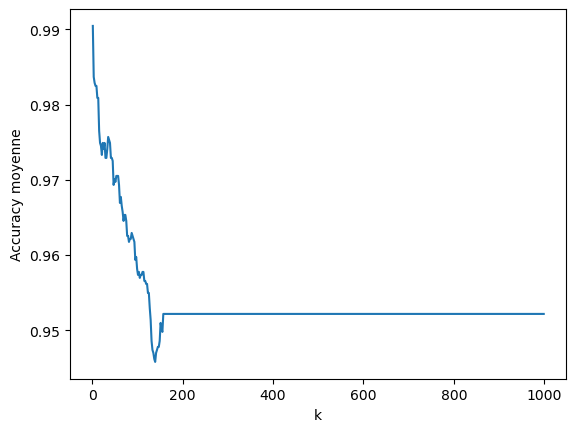

Accuracy maximum pour k = 1


In [30]:
index = np.random.permutation(len(X))
Xm = X[index]
Ym = Y[index]

dim = X.shape[1]
accuracies_test = []
nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 1000 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder

for k in valeurs_k:
    perf_test = [] #tableau des accuracies pour cette valeur de k

    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = cl.ClassifierKNN(dim, k)
        un_KNN.train(Xapp, Yapp)
        perf_test.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy_test = statistics.mean(perf_test) # moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies_test.append(acc_moy_test)


# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies_test)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("k")
plt.show()

print("Accuracy maximum pour k =", valeurs_k[accuracies_test.index(max(accuracies_test))])

### Evolution de l'accuracy au cours de l'apprentissage
Nous entraînons le classifier KNN plusieurs fois de suite avec le même ensemble de données, pour voir si l'accuracy augmente.

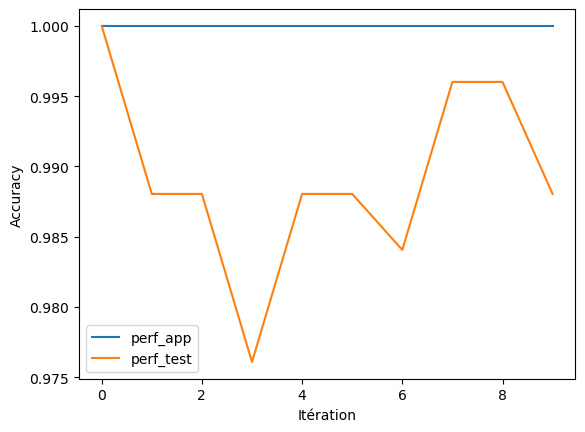

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.9892430278884462


In [31]:
nb_iter = 10
perf_app = []
perf_test = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]


# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 1)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

### Validation croisée en 10
Cette étude permet de mesurer la capacité du KNN à généraliser sur de nouvelles données (données de test différentes des données d'apprentissage) en utilisant la méthode de la validation croisée.

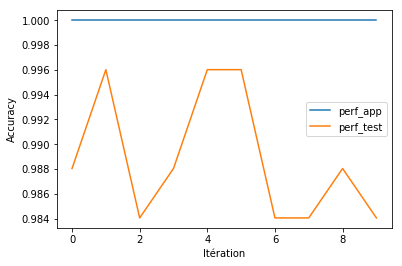

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.9888446215139443


In [8]:
nb_iter = 10
perf_app = []
perf_test = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 1)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()


#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

### Temps d'exécution
Etude du temps que le KNN met à s'entraîner puis à classifier

In [56]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 1)

    start_time = time.time()
    un_KNN.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.9900398406374502
Temps d'entraînement moyen :  1.7642974853515626e-06
Temps de prédiction moyen :  0.672178077697754


### **Conclusion pour le KNN**

### 1.3 **Classification avec Perceptron**

Dans cette partie nous essayons de répondre à notre problématique sur les fromages en utilisant le classifieur Perceptron. Nous utilisons les données qui ont été extraites ci-dessus. Les boîtes qui suivent ont pour objectif de :
- 1 & 2 : étude de l'impact des initialisations différentes de w et la variation du learning rate
- 3 : étudier l'évolution du coût au cours de l'apprentissage
- 4 : effectuer un test avec validation croisée en 10
- 5 : mesurer le temps d'exécution nécessaire pour la classification

### Variation de l'accuracy en fonction du learning rate, avec poids initial  w = 0

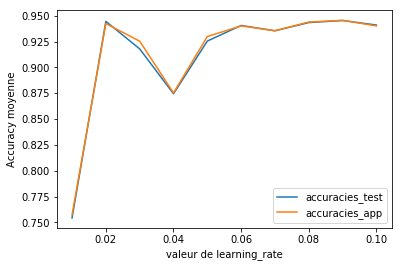

In [62]:
index = np.random.permutation(len(X))
Xm = X[index]
Ym = Y[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
dim = X.shape[1]

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = cl.ClassifierPerceptron(dim,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("test e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("app e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

### Variation de l'accuracy en fonction du learning rate, avec poids initial  w = aléatoire

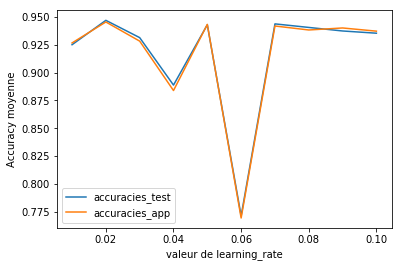

In [67]:
index = np.random.permutation(len(X))
Xm = X[index]
Ym = Y[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
dim = X.shape[1]

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = cl.ClassifierPerceptron(dim,e, False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e ,accuracies)
plt.plot(valeurs_e ,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

### Etude de l'évolution du coût au cours de l'apprentissage
Ce test permet d'étudier la vitesse de convergence de l'algorithme, à l'aide de la variation du coût au fil de l'apprentissage

Nb iterations réalisées:  100


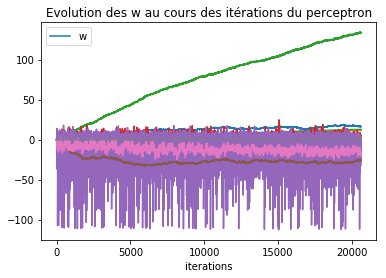

In [87]:
# étude de la variation des poids (on en a besoin pour calculer le coût)

index = np.random.permutation(len(X)) # mélange des index
Xm2 = X[index]
Ym2 = Y[index]

# Paramètres pour le perceptron:
dim = X.shape[1]
eps = 0.02    # learning rate
poids_0 = False   # valeur initiale des poids à 0

perceptron = cl.ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron.train(Xm2, Ym2, nb_max=100)
print("Nb iterations réalisées: ", len(les_differences))

allw2 = np.array(perceptron.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
for i in range (dim):
    plt.plot(allw2[:,i])

plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w'])

min_cout: 2697.598183441184
 -> w: [-6.81041212e-04 -5.62802390e-04  5.36152958e-04 -2.09687998e-04
  8.05560914e-04 -9.64693350e-04 -7.57432881e-04  7.82240865e-04
 -6.13171741e-04  2.44390098e-04 -8.57449555e-04  8.36531133e-04
 -4.16825052e-04  7.29305802e-04  1.40749594e-05  6.97506722e-04
  5.76454883e-04 -4.51195732e-05]


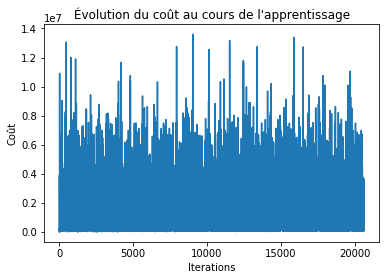

In [88]:
# étude de la variation du coût

# on considère les poids générés dans la boite précédente:
allw2 = np.array(perceptron.get_allw()) 

# ------------------------  A COMPLETER :
tabc = []
for w in allw2:
    cout = 0
    for i in range(len(Xm2)):
        score = np.dot(w, Xm2[i])
        if score * Ym2[i] < 1:
            cout += max(0, 1 - score * Ym2[i])
    tabc.append(cout)

print("min_cout: " + str(min(tabc)))
print(" -> w: " + str(allw2[tabc.index(min(tabc))]))
plt.figure()
plt.plot(tabc)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Évolution du coût au cours de l\'apprentissage')
plt.show() 

### Validation croisée en 10

e = 0.02 Taux de bonne classification moyen : 0.9342629482071714
e = 0.02 Taux de bonne classification moyen : 0.9310238305383937


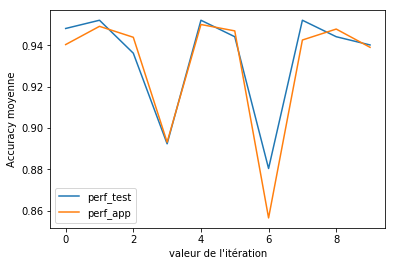

Accuracy moyenne apprentissage :  0.9310238305383937
Accuracy moyenne test :  0.9342629482071714


In [89]:
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

nb_iter = 10
e = 0.02
perf = []
perf_app = []
dim = X.shape[1]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = cl.ClassifierPerceptron(dim,e)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

### Temps d'exécution

In [90]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = cl.ClassifierPerceptron(dim,0.02)
    start_time = time.time()
    perceptron.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    perf_test.append(perceptron.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.876522506619594
Accuracy moyenne test :  0.8812749003984064
Temps d'entraînement moyen :  16.364395332336425
Temps de prédiction moyen :  0.003173422813415527


### Conclusion pour le Perceptron Biais

## 2. **Apprentissage non supervisé**


### <u>Problématique:</u> Peut-on catégoriser un groupe d'aliment en sous-groupe d'aliment et plus précisément les matières grasses?

### 2.1 Classification Clustering Hiérarchique

### Extraction des données

In [92]:
X_ref= pd.read_csv("data/AGRIBALYSE3-synthese.csv",sep=";")

X = copy.deepcopy(X_ref[X_ref['Groupe d\'aliment'] == 'matières grasses'])
X_ref= copy.deepcopy(X)

X.drop(['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Nom du Produit en Français',
        'LCI Name', 'code saison','code avion', 'Livraison', 'Matériau d\'emballage', 'Préparation', 'DQR','Score unique EF 3.1',
        'Changement climatique','Appauvrissement de la couche d\'ozone','Rayonnements ionisants','Formation photochimique d\'ozone','Particules fines',
        'Acidification terrestre et eaux douces','Eutrophisation eaux douces','Eutrophisation marine',
        'Eutrophisation terrestre','Écotoxicité pour écosystèmes aquatiques d\'eau douce','Utilisation du sol'
        ], axis=1, inplace = True)

### Classification

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [56, 68] = 0.003430253729336863
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.015462839490611

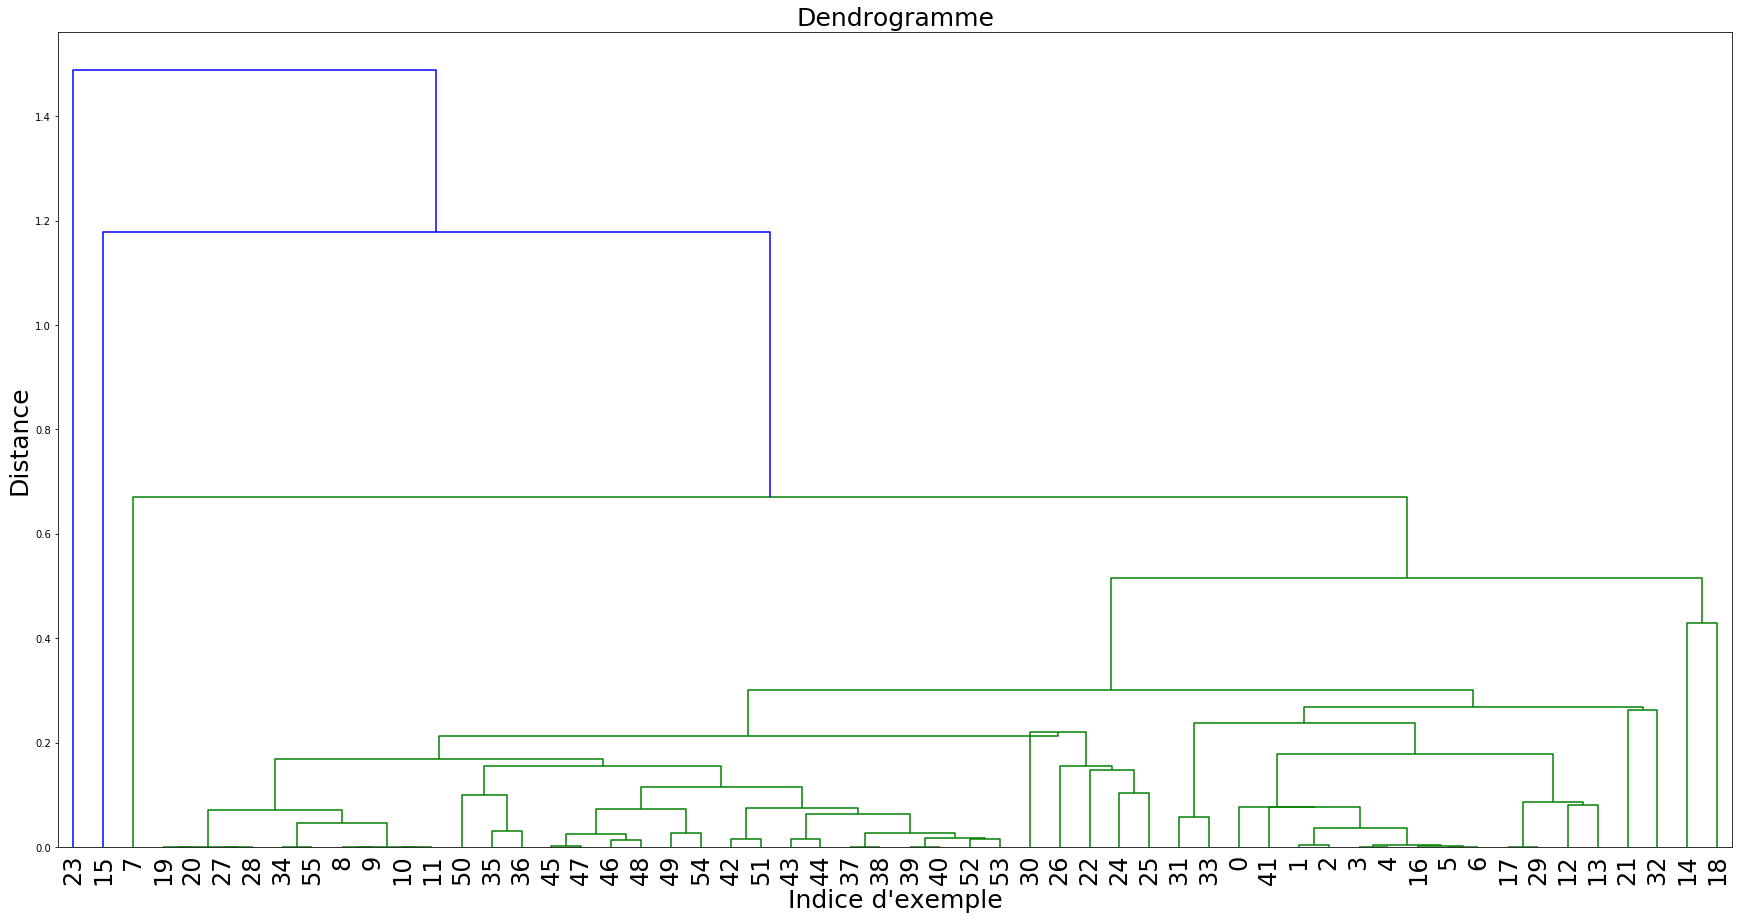

In [14]:
clust.normalisation(X)
start_time = time.time()
res_centroid = clust.CHA(X,linkage='centroid',verbose=True,dendrogramme=True)

tmp_centroide = time.time() - start_time

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [56, 68] = 0.003771618275340048
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.015462839490611

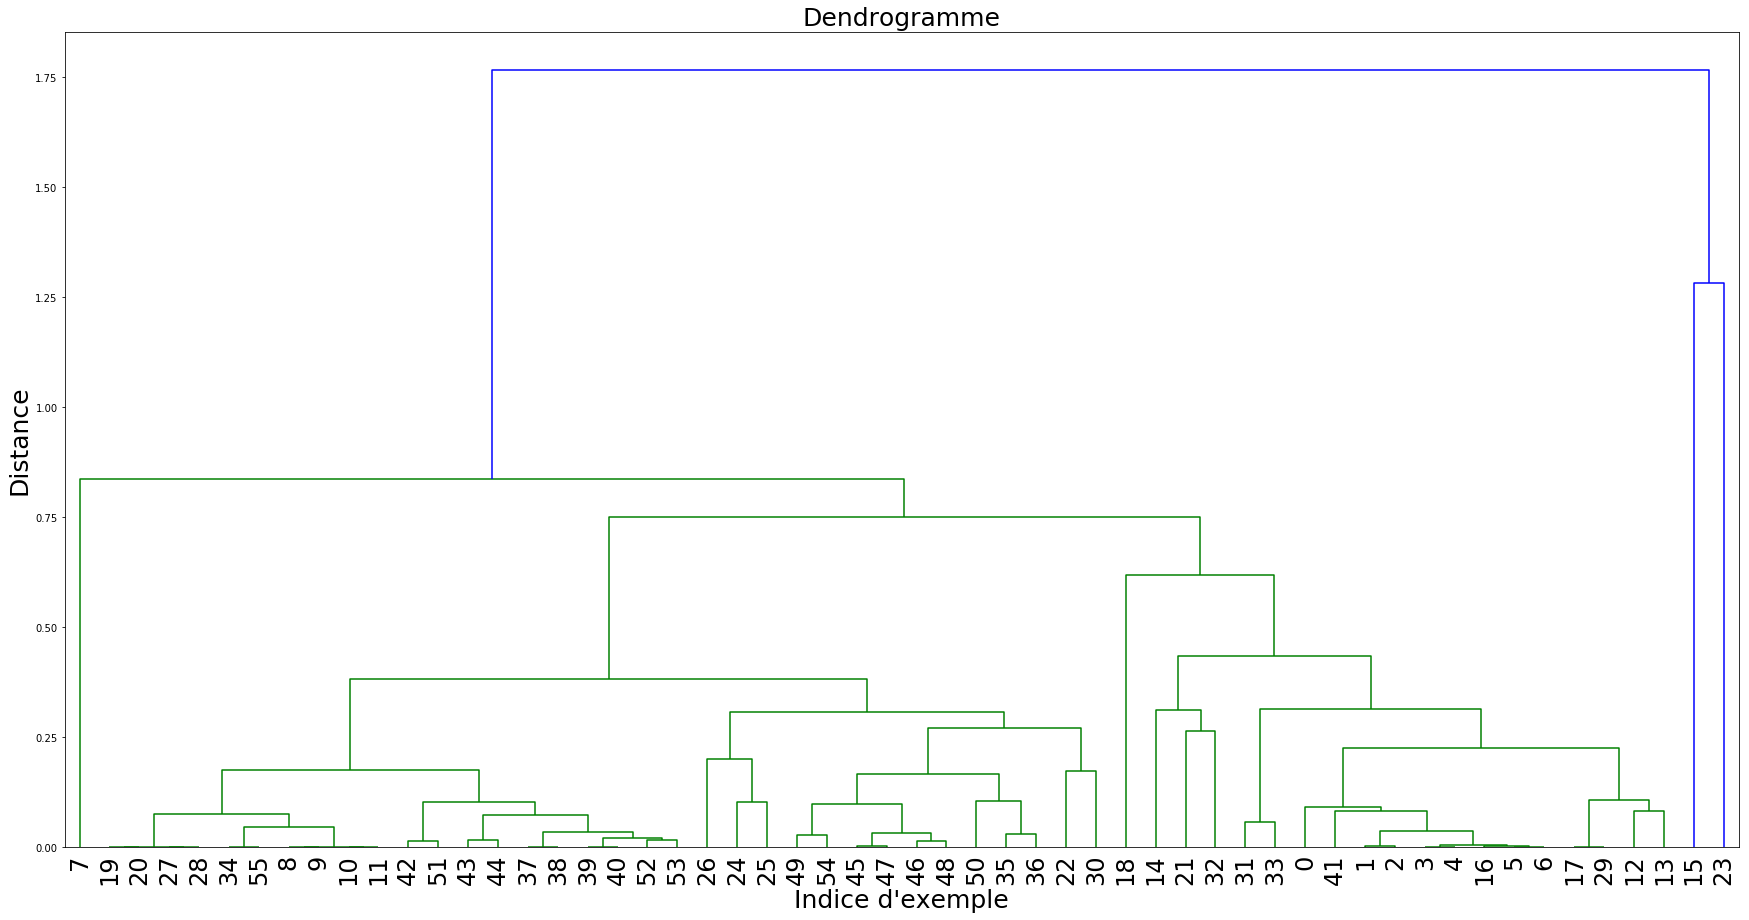

In [15]:
start_time = time.time()
res_centroid = clust.CHA(X,linkage='complete',verbose=True,dendrogramme=True)
tmp_complete = time.time() - start_time

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [56, 68] = 0.003338282781332383
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.015462839490611

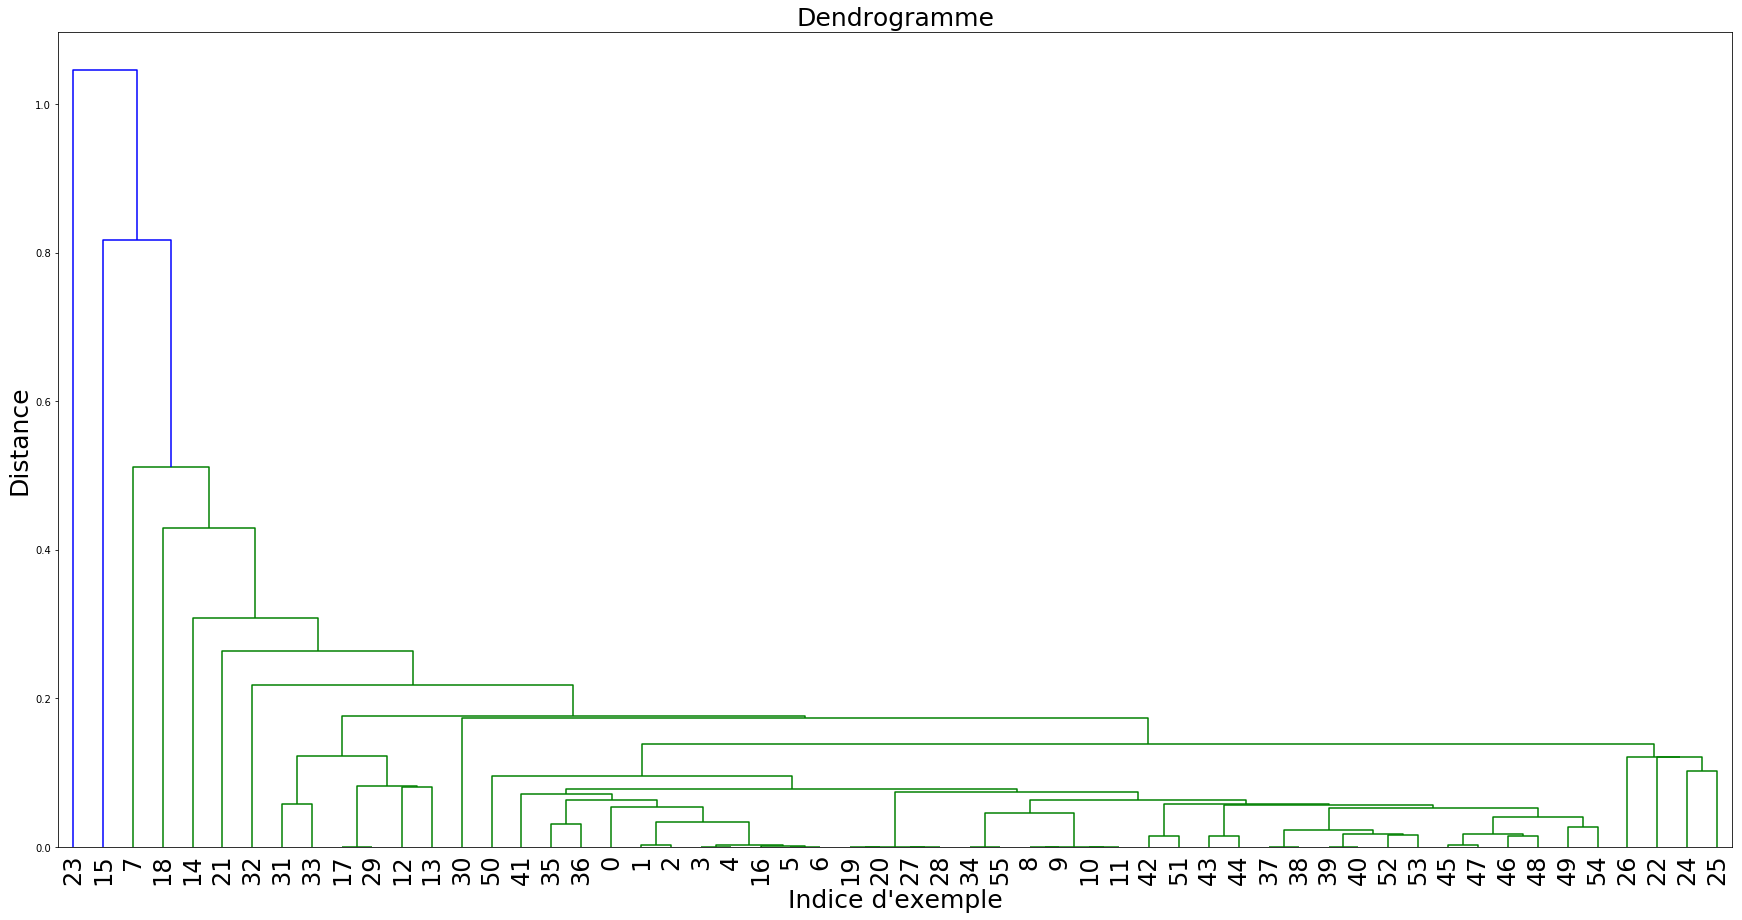

In [16]:
start_time = time.time()
res_centroid = clust.CHA(X,linkage='simple',verbose=True,dendrogramme=True)
tmp_simple = time.time() - start_time

Distance minimale trouvée entre [3, 4] = 0.0
Distance minimale trouvée entre [5, 6] = 0.0
Distance minimale trouvée entre [8, 9] = 0.0
Distance minimale trouvée entre [10, 11] = 0.0
Distance minimale trouvée entre [17, 29] = 0.0
Distance minimale trouvée entre [19, 20] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [34, 55] = 0.0
Distance minimale trouvée entre [37, 38] = 0.0
Distance minimale trouvée entre [39, 40] = 0.0
Distance minimale trouvée entre [58, 59] = 0.0
Distance minimale trouvée entre [61, 62] = 0.0
Distance minimale trouvée entre [16, 57] = 0.0013491365729261194
Distance minimale trouvée entre [45, 47] = 0.002879008290985356
Distance minimale trouvée entre [1, 2] = 0.0031319225223431345
Distance minimale trouvée entre [68, 56] = 0.0034827279460016044
Distance minimale trouvée entre [46, 48] = 0.0142461760895419
Distance minimale trouvée entre [42, 51] = 0.014729432633811986
Distance minimale trouvée entre [43, 44] = 0.01546283949061

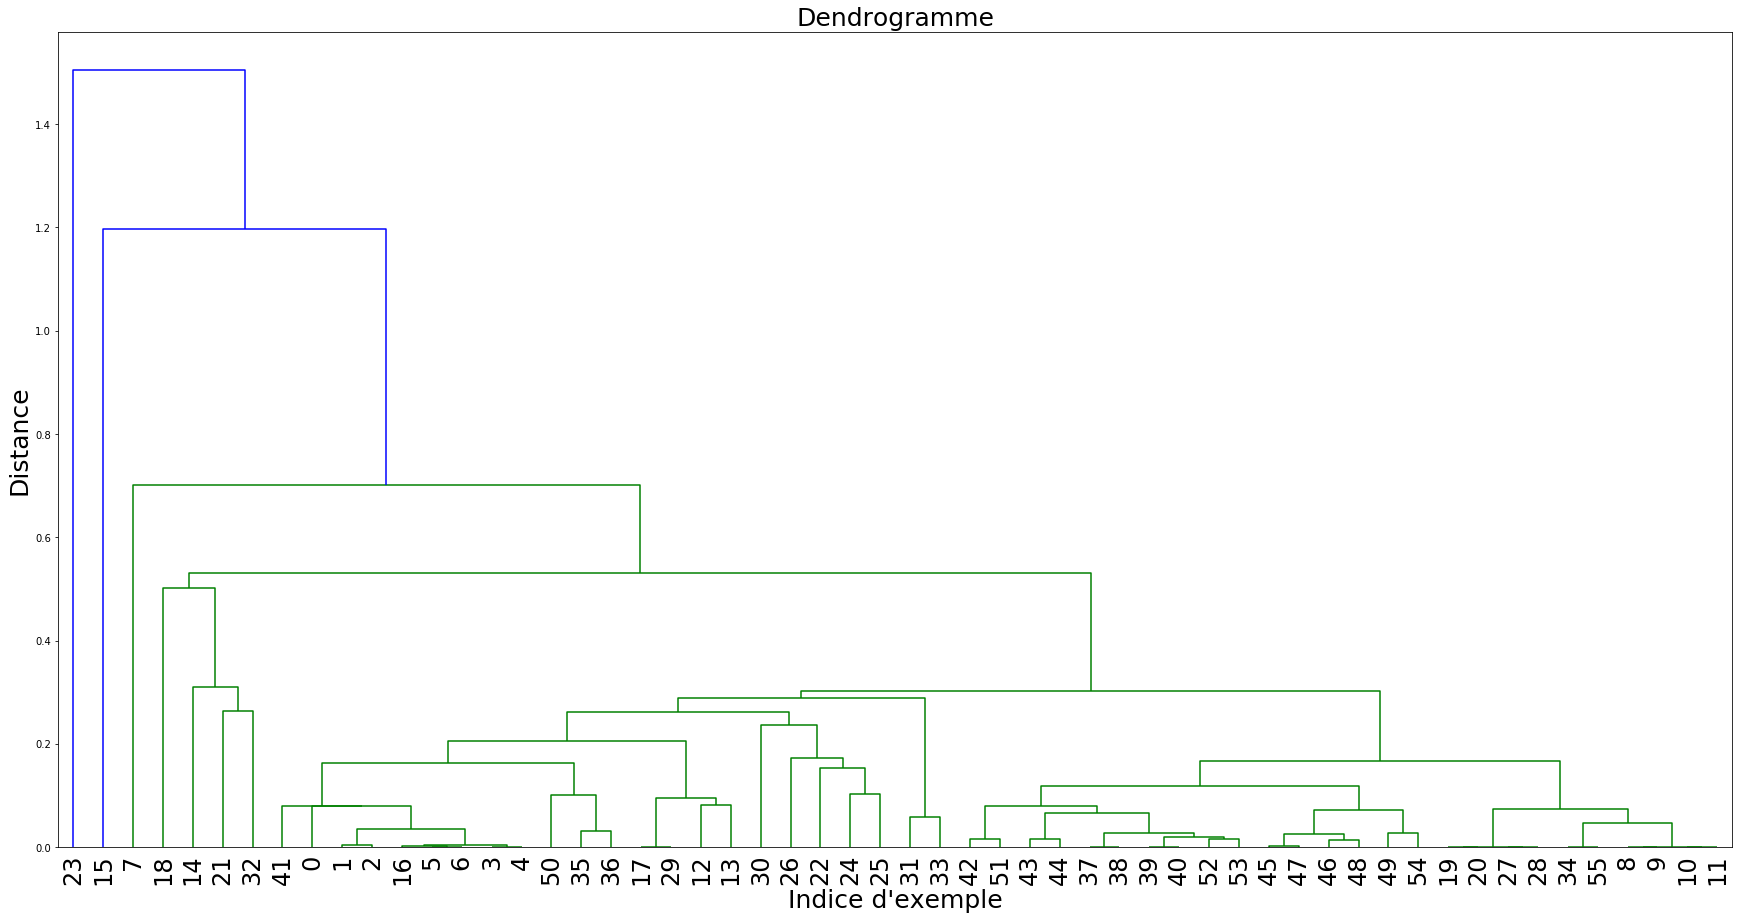

In [17]:
start_time = time.time()
res_centroid = clust.CHA(X,linkage='average',verbose=True,dendrogramme=True)
tmp_average = time.time() - start_time

#### Analyse des résultats: 
Les dendogrammes des différents linkage de l'algorithme de clustering hiérarchique, nous indiquent 2 catégories principales dans le classement des matières grasses.

#### Temps d'exécution

In [25]:
print("temps d'exécution centroïde : " + str(tmp_centroide) + "s")
print("temps d'exécution complete : " + str(tmp_complete) + "s")
print("temps d'exécution simple : " + str(tmp_simple) + "s")
#print("temps d'exécution average" + str(tmp_average))

temps d'exécution centroïde : 26.08559012413025s
temps d'exécution complete : 80.36198687553406s
temps d'exécution simple : 77.62487196922302s


### 2.2 Classification avec K-means

### Extraction des données

In [93]:
X_ref= pd.read_csv("data/AGRIBALYSE3-synthese.csv",sep=";")

X = copy.deepcopy(X_ref[X_ref['Groupe d\'aliment'] == 'matières grasses'])
X_ref= copy.deepcopy(X)

X.drop(['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Nom du Produit en Français',
        'LCI Name', 'code saison','code avion', 'Livraison', 'Matériau d\'emballage', 'Préparation', 'DQR','Score unique EF 3.1',
        'Changement climatique','Appauvrissement de la couche d\'ozone','Rayonnements ionisants','Formation photochimique d\'ozone','Particules fines',
        'Acidification terrestre et eaux douces','Eutrophisation eaux douces','Eutrophisation marine',
        'Eutrophisation terrestre','Écotoxicité pour écosystèmes aquatiques d\'eau douce','Utilisation du sol'
        ], axis=1, inplace = True)

D'après le clustering hierarchique qui a déduit 2 catégories dans les matières grasses, on peut poser K=2

### Classification

iteration 0 Inertie : 16622.64882136038 Difference: 16622.64882136038
iteration 1 Inertie : 14759.649879649296 Difference: 1862.9989417110846
iteration 2 Inertie : 11174.628435547356 Difference: 3585.02144410194
iteration 3 Inertie : 8573.08784298546 Difference: 2601.540592561896
iteration 4 Inertie : 8039.436122986226 Difference: 533.651719999234
iteration 5 Inertie : 7685.779070408224 Difference: 353.65705257800255
iteration 6 Inertie : 7685.779070408224 Difference: 0.0

index de dunn: 0.5427537895322111
index de xie-beni: 32.60786127734864

Temps d'exécution : 0.13533854484558105


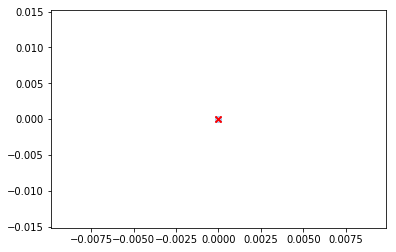

In [105]:
K = 2
epsilon = 0.05
iter_max = 1000

start_time = time.time()
les_centres, l_affectation = clust.kmoyennes(K, X, epsilon, iter_max)
tmp_kmoyenne = time.time() - start_time

idu = clust.dunn_index(les_centres, l_affectation)
print("\nindex de dunn: " + str(idu))
ix = clust.xie_beni_index(les_centres, l_affectation)
print("index de xie-beni: " + str(ix))
print()
print("Temps d'exécution : " + str(tmp_kmoyenne))

clust.affiche_resultat(X,les_centres,l_affectation)

In [106]:
print("Classification pour K = 2")
for k in l_affectation:
    print()
    print("--------------- CHANGEMENT DE K --------------")
    print()
    for i in l_affectation[k]:
        e = X_ref.iloc[i]
        print(e['Sous-groupe d\'aliment'])

Classification pour K = 2

--------------- CHANGEMENT DE K --------------

beurres
beurres
beurres
beurres
beurres
beurres
beurres
huiles et graisses végétales
autres matières grasses
autres matières grasses
autres matières grasses
autres matières grasses
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
beurres
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
autres matières grasses
beurres
beurres
margarines
margarines
margarines
margarines
huiles et graisses végétales
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarine

iteration 0 Inertie : 13964.114598434597 Difference: 13964.114598434597
iteration 1 Inertie : 9947.670783834017 Difference: 4016.4438146005796
iteration 2 Inertie : 6732.170329511022 Difference: 3215.500454322995
iteration 3 Inertie : 6162.470892578288 Difference: 569.699436932734
iteration 4 Inertie : 4776.35588267432 Difference: 1386.1150099039678
iteration 5 Inertie : 4776.35588267432 Difference: 0.0

index de dunn: 0.11308838330540456
index de xie-beni: 505.19099963444086

Temps d'exécution : 0.1622152328491211


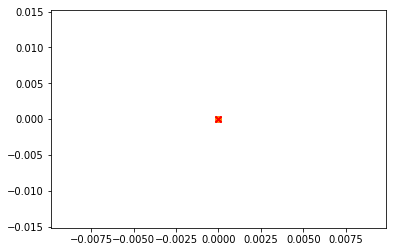

In [101]:
K = 3
epsilon = 0.05
iter_max = 1000

start_time = time.time()
les_centres, l_affectation = clust.kmoyennes(K, X, epsilon, iter_max)
tmp_kmoyenne = time.time() - start_time

idu = clust.dunn_index(les_centres, l_affectation)
print("\nindex de dunn: " + str(idu))
ix = clust.xie_beni_index(les_centres, l_affectation)
print("index de xie-beni: " + str(ix))
print()
print("Temps d'exécution : " + str(tmp_kmoyenne))
clust.affiche_resultat(X,les_centres,l_affectation)

In [107]:
print("Classification pour K = 3")
for k in l_affectation:
    print()
    print("--------------- CHANGEMENT DE K --------------")
    print()
    for i in l_affectation[k]:
        e = X_ref.iloc[i]
        print(e['Sous-groupe d\'aliment'])

Classification pour K = 3

--------------- CHANGEMENT DE K --------------

beurres
beurres
beurres
beurres
beurres
beurres
beurres
huiles et graisses végétales
autres matières grasses
autres matières grasses
autres matières grasses
autres matières grasses
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
beurres
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
autres matières grasses
beurres
beurres
margarines
margarines
margarines
margarines
huiles et graisses végétales
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarine

iteration 0 Inertie : 7263.115150888648 Difference: 7263.115150888648
iteration 1 Inertie : 6587.196861108237 Difference: 675.9182897804112
iteration 2 Inertie : 5979.677668653871 Difference: 607.519192454366
iteration 3 Inertie : 4575.4949946842125 Difference: 1404.182673969658
iteration 4 Inertie : 4518.0442428874585 Difference: 57.45075179675405
iteration 5 Inertie : 4497.340915699838 Difference: 20.703327187620744
iteration 6 Inertie : 4058.486743672381 Difference: 438.85417202745657
iteration 7 Inertie : 3352.4438983916043 Difference: 706.0428452807769
iteration 8 Inertie : 3099.5862807737976 Difference: 252.85761761780668
iteration 9 Inertie : 3099.5862807737976 Difference: 0.0

index de dunn: 0.07639246659987489
index de xie-beni: 832.1947281063904

Temps d'exécution : 0.21886920928955078


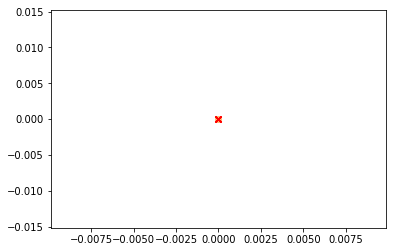

In [109]:
K = 4
epsilon = 0.05
iter_max = 1000

start_time = time.time()
les_centres, l_affectation = clust.kmoyennes(K, X, epsilon, iter_max)
tmp_kmoyenne = time.time() - start_time

idu = clust.dunn_index(les_centres, l_affectation)
print("\nindex de dunn: " + str(idu))
ix = clust.xie_beni_index(les_centres, l_affectation)
print("index de xie-beni: " + str(ix))
print()
print("Temps d'exécution : " + str(tmp_kmoyenne))

clust.affiche_resultat(X,les_centres,l_affectation)

In [110]:
print("Classification pour K = 4")
for k in l_affectation:
    print()
    print("--------------- CHANGEMENT DE K --------------")
    print()
    for i in l_affectation[k]:
        e = X_ref.iloc[i]
        print(e['Sous-groupe d\'aliment'])

Classification pour K = 4

--------------- CHANGEMENT DE K --------------

huiles et graisses végétales
huiles et graisses végétales

--------------- CHANGEMENT DE K --------------

beurres
beurres
beurres
beurres
beurres
beurres
beurres
huiles et graisses végétales
beurres
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
beurres
beurres
huiles et graisses végétales
margarines
margarines
margarines

--------------- CHANGEMENT DE K --------------

huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales

--------------- CHANGEMENT DE K --------------

autres matières grasses
autres matières grasses
autres matières grasses
autres matières grasses
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles de poissons
huiles de poissons
huiles et graisses végétales


#### Analyse du résultat

On sait que plus l'index de dunn est élevé, mieux est la séparation entre les clusters.
Et contrairement à l'index de dunn, plus l'index de xie-beni est faible, plus compacts et mieux séparés sont les clusters.
Cependant, en observant le sous-groupe de chaques exemples des différents clusters ci-dessous.
On peut observer 4 sous-groupe différents.

Cela peut s'expliquer par le fait que la description des différents exemples soient trop similaires et donc a du mal à être catégoriser.

#### Temps d'exécution

In [44]:
print("temps d'exécution k-moyenne: " + str(tmp_kmoyenne) + "s")

temps d'exécution k-moyenne: 0.32102417945861816s
